In [2]:
import random
random.seed(122)

import csv
import pandas as pd
import numpy as np
import xgboost as xgb
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from sklearn.model_selection import train_test_split

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import DMatrix
from matplotlib import pyplot
from math import *

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
    
with open('crg123.csv','rb') as data2:
    features2 = pd.read_csv(data2)
      
   
start = time.time()  

features=features.rename(columns = {'interact':'label'})
features2=features2.rename(columns = {'interact':'label'})

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

features2.loc[features2['label']=='YES','label']=1
features2.loc[features2['label']=='NO','label']=0

features = features[features.columns.drop(list(features.filter(regex='Pathogen')))]
features2 = features2[features2.columns.drop(list(features2.filter(regex='Pathogen')))]


#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)
features2 = features2.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
train_labels = np.array(features['label'])
test_labels = np.array(features2['label'])
# Remove the labels from the features
# axis 1 refers to the columns
train_features= features.drop('label', axis = 1)
test_features= features2.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(train_features.columns)
# Convert to numpy array
train_features = np.array(train_features)
test_features = np.array(test_features)

#Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)
end = time.time()

print(round(end - start,2)," seconds elapsed")

print(feature_list)


(0.13, ' seconds elapsed')
['Host_Ala', 'Host_Arg', 'Host_Asn', 'Host_Asp', 'Host_Cys', 'Host_Gln', 'Host_Glu', 'Host_Gly', 'Host_His', 'Host_Ile', 'Host_Leu', 'Host_Lys', 'Host_Met', 'Host_Phe', 'Host_Pro', 'Host_Ser', 'Host_Thr', 'Host_Trp', 'Host_Tyr', 'Host_Val', 'GO_Similarity_Score']


(18.19, ' seconds elapsed')
[[123 161]
 [ 57 172]]
              precision    recall  f1-score   support

           0       0.68      0.43      0.53       284
           1       0.52      0.75      0.61       229

   micro avg       0.58      0.58      0.58       513
   macro avg       0.60      0.59      0.57       513
weighted avg       0.61      0.58      0.57       513

('Accuracy:', 0.5750487329434698)


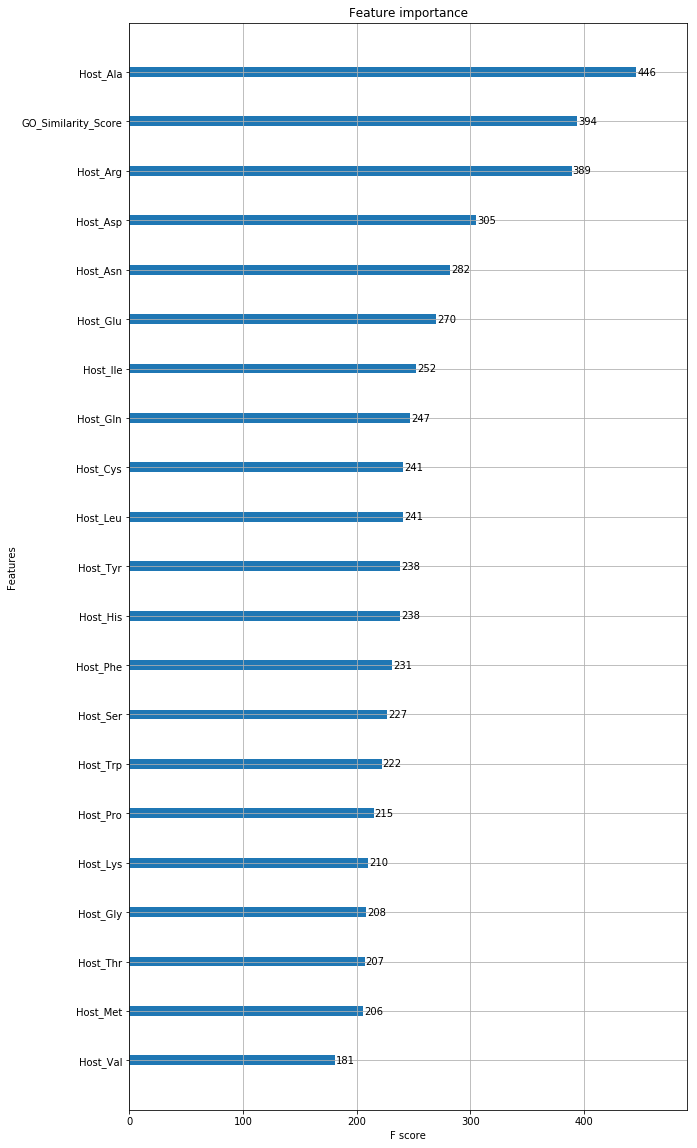

In [3]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 100
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

(23.45, ' seconds elapsed')
[[106 178]
 [ 53 176]]
              precision    recall  f1-score   support

           0       0.67      0.37      0.48       284
           1       0.50      0.77      0.60       229

   micro avg       0.55      0.55      0.55       513
   macro avg       0.58      0.57      0.54       513
weighted avg       0.59      0.55      0.53       513

('Accuracy:', 0.5497076023391813)


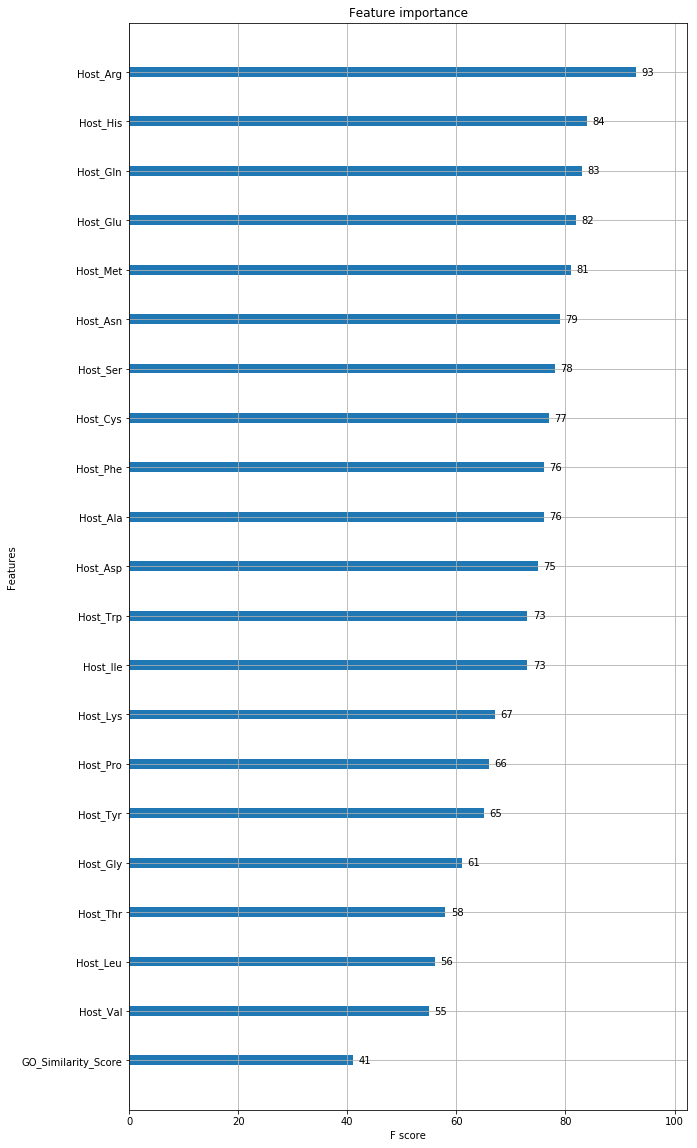

In [4]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
#param = {'silent':1}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance - 
#code refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# reference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

In [5]:
#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python
start = time.time() 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate model with 100 decision trees 
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

#calcualte the accuracy
accuracy = sum(predictions.round() == test_labels)/test_labels.size
# Print out the Accuracy
print('Accuracy:', 100*round(accuracy, 4), '%.')

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))



('Accuracy:', 0.0, '%.')
(113.73, ' seconds elapsed')
[[101 183]
 [ 51 178]]
              precision    recall  f1-score   support

           0       0.66      0.36      0.46       284
           1       0.49      0.78      0.60       229

   micro avg       0.54      0.54      0.54       513
   macro avg       0.58      0.57      0.53       513
weighted avg       0.59      0.54      0.53       513

('Accuracy:', 0.543859649122807)
Variable: GO_Similarity_Score  Importance: 0.21
Variable: Host_Arg             Importance: 0.13
Variable: Host_Ile             Importance: 0.06
Variable: Host_Asp             Importance: 0.05
Variable: Host_Cys             Importance: 0.04
Variable: Host_Glu             Importance: 0.04
Variable: Host_Tyr             Importance: 0.04
Variable: Host_Ala             Importance: 0.03
Variable: Host_Asn             Importance: 0.03
Variable: Host_Gln             Importance: 0.03
Variable: Host_Gly             Importance: 0.03
Variable: Host_His             Impo

In [6]:
#re-import data without Pathogen and GSO columns

#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
      
with open('crg123.csv','rb') as data2:
    features2 = pd.read_csv(data2)
    
start = time.time()  

features=features.rename(columns = {'interact':'label'})
features2=features2.rename(columns = {'interact':'label'})

#remove columns 
features = features[features.columns.drop(list(features.filter(regex='Pathogen|GO_S')))]
features2 = features2[features2.columns.drop(list(features2.filter(regex='Pathogen|GO_S')))]

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

features2.loc[features2['label']=='YES','label']=1
features2.loc[features2['label']=='NO','label']=0

#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)
features2 = features2.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
train_labels = np.array(features['label'])
test_labels = np.array(features2['label'])
# Remove the labels from the features
# axis 1 refers to the columns
train_features= features.drop('label', axis = 1)
test_features= features2.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(train_features.columns)
# Convert to numpy array
train_features = np.array(train_features)
test_features = np.array(test_features)

start = time.time() 




# Instantiate model with 100 decision trees  
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

end = time.time()

print(str(round(end - start,2))+" seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:"+str(metrics.accuracy_score(test_labels,predictions.round())))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 

for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))






84.87 seconds elapsed
[[115 169]
 [ 51 178]]
              precision    recall  f1-score   support

           0       0.69      0.40      0.51       284
           1       0.51      0.78      0.62       229

   micro avg       0.57      0.57      0.57       513
   macro avg       0.60      0.59      0.56       513
weighted avg       0.61      0.57      0.56       513

Accuracy:0.571150097465887
Variable: Host_Arg             Importance: 0.15
Variable: Host_Ile             Importance: 0.09
Variable: Host_Asp             Importance: 0.06
Variable: Host_Cys             Importance: 0.06
Variable: Host_His             Importance: 0.05
Variable: Host_Tyr             Importance: 0.05
Variable: Host_Asn             Importance: 0.04
Variable: Host_Gln             Importance: 0.04
Variable: Host_Glu             Importance: 0.04
Variable: Host_Leu             Importance: 0.04
Variable: Host_Met             Importance: 0.04
Variable: Host_Phe             Importance: 0.04
Variable: Host_Pro       

(44.31, ' seconds elapsed')
[[121 163]
 [ 53 176]]
              precision    recall  f1-score   support

           0       0.70      0.43      0.53       284
           1       0.52      0.77      0.62       229

   micro avg       0.58      0.58      0.58       513
   macro avg       0.61      0.60      0.57       513
weighted avg       0.62      0.58      0.57       513

('Accuracy:', 0.5789473684210527)


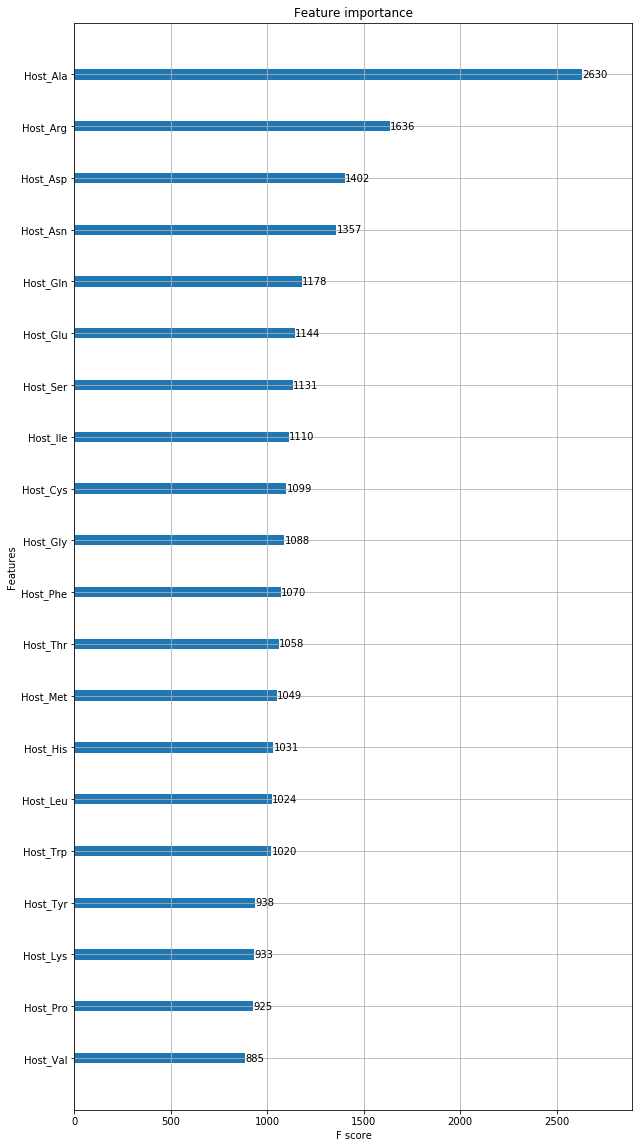

In [7]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

(16.89, ' seconds elapsed')
[[100 184]
 [ 46 183]]
              precision    recall  f1-score   support

           0       0.68      0.35      0.47       284
           1       0.50      0.80      0.61       229

   micro avg       0.55      0.55      0.55       513
   macro avg       0.59      0.58      0.54       513
weighted avg       0.60      0.55      0.53       513

('Accuracy:', 0.5516569200779727)


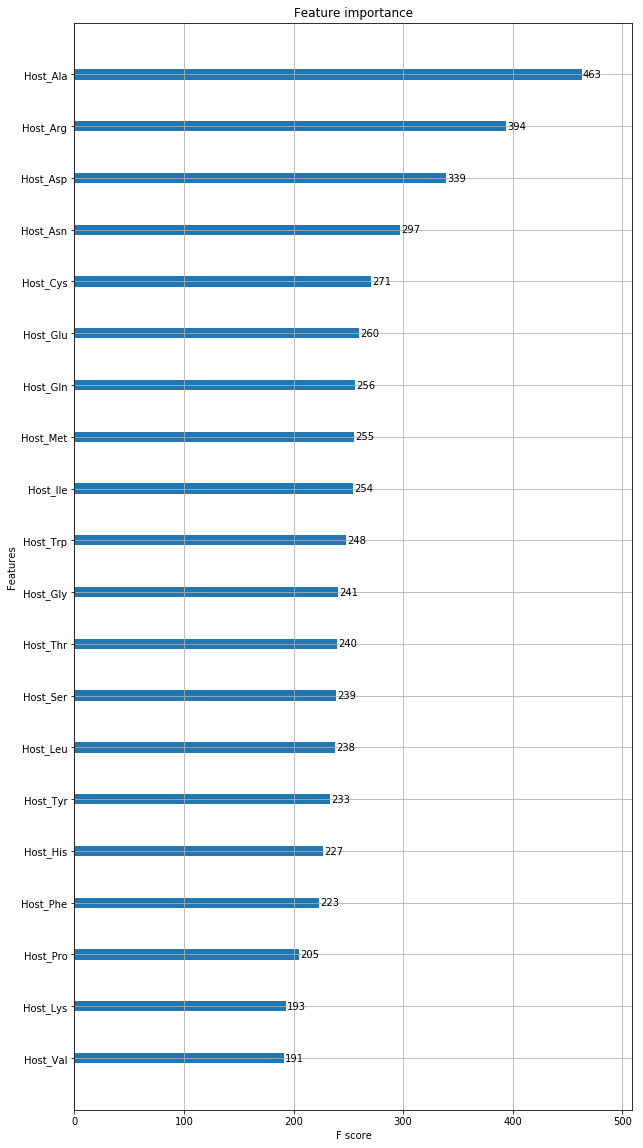

In [8]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 100
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

In [31]:
#Let's try getting rid of the pathogen
#Let's do normlization


#re-import data without columns that have less than 0.02 from the above feature importance print out

#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
      
with open('crg123.csv','rb') as data2:
    features2 = pd.read_csv(data2)
    
start = time.time()  

features=features.rename(columns = {'interact':'label'})
features2=features2.rename(columns = {'interact':'label'})

#remove columns 
features = features[features.columns.drop(list(features.filter(regex='Pathogen')))]
features2 = features2[features2.columns.drop(list(features2.filter(regex='Pathogen')))]

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

features2.loc[features2['label']=='YES','label']=1
features2.loc[features2['label']=='NO','label']=0

#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)
features2 = features2.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
train_labels = np.array(features['label'])
test_labels = np.array(features2['label'])
# Remove the labels from the features
# axis 1 refers to the columns
train_features= features.drop('label', axis = 1)
test_features= features2.drop('label', axis = 1)

#normalize
train_features=(train_features-train_features.mean())/train_features.std()
test_features=(test_features-test_features.mean())/test_features.std()


# Saving feature names for later use
feature_list = list(train_features.columns)
# Convert to numpy array
train_features = np.array(train_features)
test_features = np.array(test_features)

start = time.time() 




# Instantiate model with 100 decision trees  
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

end = time.time()

print(str(round(end - start,2))+" seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:"+str(metrics.accuracy_score(test_labels,predictions.round())))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 

for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))



117.95 seconds elapsed
[[142 142]
 [ 97 132]]
              precision    recall  f1-score   support

           0       0.59      0.50      0.54       284
           1       0.48      0.58      0.52       229

   micro avg       0.53      0.53      0.53       513
   macro avg       0.54      0.54      0.53       513
weighted avg       0.54      0.53      0.53       513

Accuracy:0.5341130604288499
Variable: GO_Similarity_Score  Importance: 0.21
Variable: Host_Arg             Importance: 0.13
Variable: Host_Ile             Importance: 0.06
Variable: Host_Asp             Importance: 0.05
Variable: Host_Cys             Importance: 0.04
Variable: Host_Glu             Importance: 0.04
Variable: Host_Tyr             Importance: 0.04
Variable: Host_Ala             Importance: 0.03
Variable: Host_Asn             Importance: 0.03
Variable: Host_Gln             Importance: 0.03
Variable: Host_Gly             Importance: 0.03
Variable: Host_His             Importance: 0.03
Variable: Host_Leu     

(68.48, ' seconds elapsed')
[[144 140]
 [ 79 150]]
              precision    recall  f1-score   support

           0       0.65      0.51      0.57       284
           1       0.52      0.66      0.58       229

   micro avg       0.57      0.57      0.57       513
   macro avg       0.58      0.58      0.57       513
weighted avg       0.59      0.57      0.57       513

('Accuracy:', 0.5730994152046783)


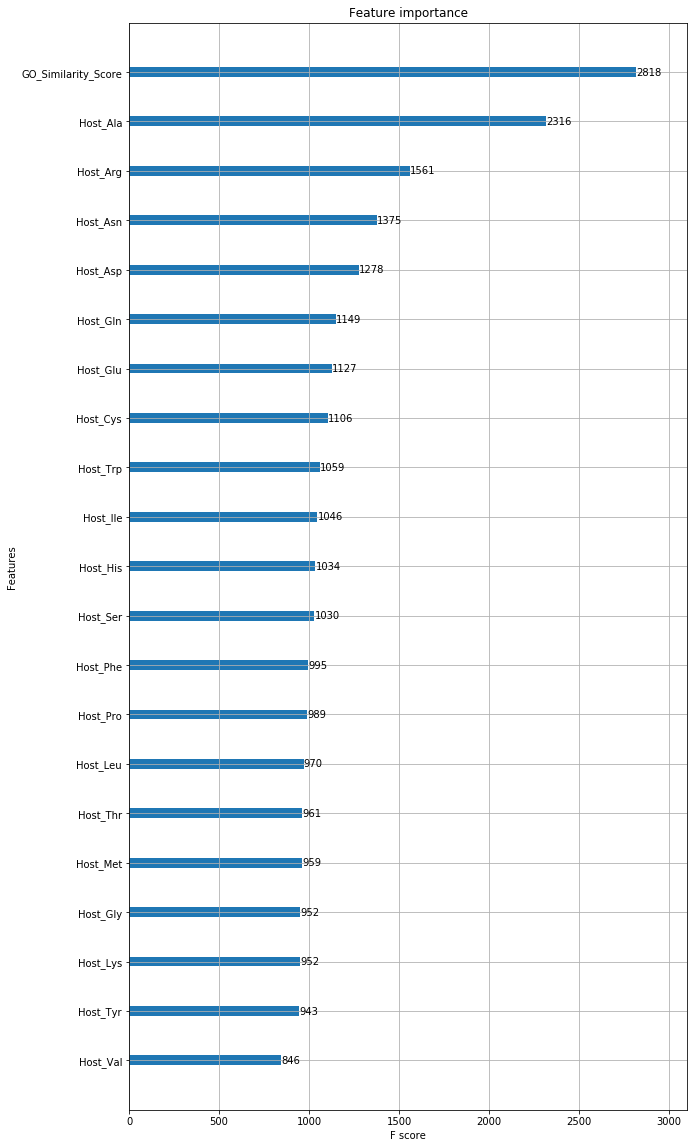

In [32]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()